# Data Visualization
Data visualization is the discipline of trying to understand data by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.

Python offers multiple great graphing libraries that come packed with lots of different features. No matter if you want to create interactive, live or highly customized plots python has an excellent library for you.

# Plotly 

**Plotly** (Plot.ly as its URL goes), is a tech-computing company based in Montreal. It is known for developing and providing online analytics, statistics and graphing tools for individuals or companies. It also develops/provides scientific graphing libraries for Arduino, Julia, MATLAB, Perl, Python, R and REST.

This data visualization library is by far my go-to library whenever I want to create visualizations that need to be highly interactive for the user. Plotly is highly compatible with Jupyter Notebook and Web Browsers. This means whatever interactive plots you create can easily be shared in the same manner with your teammates or end-users.Plotly supports a gamut of plots right from basic chart types, Seaborn-like beautiful and advanced plots, 3-D plots, Map-based visualizations, scientific plots, etc.Plotly’s plots can also support animation capabilities as well.

**Plotly** has got some amazing features that make it better than other graphing libraries:

* It is interactive by default
* Charts are not saved as images but serialized as JSON, making them open to be read with R, MATLAB, Julia and others easily
* Exports vector for print/publication
* Easy to manipulate/embed on web

<font color = "blue" >
    Plot Contents:
        
   1. [Loading Data and Explanation of Features](#1)
   2. [Line Charts](#2)
   3. [Scatter Charts](#3)
   4. [Bar Charts](#4)
   5. [Pie Charts](#5)
   6. [Bubble Charts](#6)
   7. [Histogram](#7)
   8. [Word Cloud](#8)
   9. [Box Plot](#9)
   10. [Scatter Plot Matrix](#10)
   11. [Inset Plots](#11)
   12. [3D Scatter Plot with Colorscaling](#12)
   13. [Multiple Subplots](#13)
   14. [Animated Data Visualization using Plotly Express](#14)

# Information about Dataset - World University Rankings

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other. This dataset contains three global university rankings from very different places.

The Times Higher Education World University Ranking is widely regarded as one of the most influential and widely observed university measures. Founded in the United Kingdom in 2010, it has been criticized for its commercialization and for undermining non-English-instructing institutions.

The Academic Ranking of World Universities, also known as the Shanghai Ranking, is an equally influential ranking. It was founded in China in 2003 and has been criticized for focusing on raw research power and for undermining humanities and quality of instruction.

The Center for World University Rankings, is a less well know listing that comes from Saudi Arabia, it was founded in 2012.

How do these rankings compare to each other?
Are the various criticisms levied against these rankings fair or not?
How does your alma mater fare against the world?

**Supplementary Data**
To further extend your analyses, we've also included two sets of supplementary data.

The first of these is a set of data on educational attainment around the world. It comes from The World Data Bank and comprises information from the UNESCO Institute for Statistics and the Barro-Lee Dataset. How does national educational attainment relate to the quality of each nation's universities?

The second supplementary dataset contains information about public and private direct expenditure on education across nations. This data comes from the National Center for Education Statistics. It represents expenditure as a percentage of gross domestic product. Does spending more on education lead to better international university rankings?

In [1]:
import numpy as np
#NumPy is a python library used for working with arrays.
#It also has functions for working in domain of linear algebra, fourier transform, and matrices.
#We have lists that serve the purpose of arrays, but they are slow.NumPy aims to provide an array object that is up to 50x faster that traditional Python lists.

import pandas as pd 
#Why pandas: you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — 
#a table, basically — then let you do things like:
#Calculate statistics and answer questions about the data, like: What's the average, median, max, or min of each column?
#Does column A correlate with column B?
#What does the distribution of data in column C look like?
#Clean the data by doing things like removing missing values and filtering rows or columns by some criteria
#Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more.
#Store the cleaned, transformed data back into a CSV, other file or database

import os
#The OS module in python provides functions for interacting with the operating system.
#This module provides a portable way of using operating system dependent functionality.
#The *os* and *os.path* modules include many functions to interact with the file system.

import matplotlib.pyplot as plt
#Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
plt.style.use("seaborn-whitegrid")
#plt.style.available : To see all the available style in matplotlib library

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
#UTF-8 is a variable-width character encoding standard 
#that uses between one and four eight-bit bytes to represent all valid Unicode code points.

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

life-expectancy
world-university-rankings

/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/life-expectancy/Metadata_Country_API_SP.DYN.LE00.IN_DS2_en_csv_v2_1308162.csv
/kaggle/input/life-expectancy/Metadata_Indicator_API_SP.DYN.LE00.IN_DS2_en_csv_v2_1308162.csv
/kaggle/input/life-expectancy/API_SP.DYN.LE00.IN_DS2_en_csv_v2_1308162.csv


<a id = "1" ></a>
# 1. Loading Data and Explanation of Features

In [2]:
timesData = pd.read_csv("/kaggle/input/world-university-rankings/timesData.csv")
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [3]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


<a id = "2" ></a>
# 2. Line Charts

Line plot in Plotly is much accessible and  illustrious annexation to plotly which manage variety of types of data, and assemble easy-to-style statistic.With px.line each data position is represented as a vertex  (which location is given by the x and y columns) of a polyline mark in 2D space. Line chart Displays a series of numerical data as points which are connected by lines. It visualizes to show two data trends. The main productive feature is it can display thousands of data points without scrolling. It can be created using the line() method of plotly.express class.

In [4]:
#Line Charts Example: Citation and Teaching vs World Rank of Top 100 Universities

# prepare data frame
df = timesData.iloc[:100, :]

import plotly
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df.world_rank,   #x axis
                    y = df.citations,    #y axis
                    mode = "lines",      #type of plot like marker, line or line + markers
                    name = "citations",  #name of the plots
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)   #The hover text

# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)

data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)   # fig = it includes data and layout
plotly.offline.iplot(fig)                               #iplot() = plots the figure(fig) that is created by data and layout

<a id = "3" ></a>
# 3. Scatter Charts

A scatter plot is a diagram where each value is represented by the dot graph. Scatter  plot needs arrays for the same length, one for the value of x-axis and other value for the y-axis. Each data is represented as a dot point, whose location is given by x and y columns. It can be created using the scatter() method of plotly.express

In [5]:
import plotly.express as px 
import numpy as np  

# function of numpy.random  
np.random.seed(42)  
    
random_x= np.random.randint(1,101,100)  
random_y= np.random.randint(1,101,100)  
    
plot = px.scatter(random_x, random_y) 
plot.show()

In [6]:
#Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years

# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

import plotly
import plotly.graph_objs as go

# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)

data = [trace1, trace2, trace3]

layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)
plotly.offline.iplot(fig) 

<a id = "4" ></a>
# 4. Bar Charts

Bar chart with plotly express is much convenient and   high-level frontier to plotly, which helps to operate diversification of data and which helps to produce easy-to-style figures. With px. bar, each row in the DataFrame is represented as a rectangular mark, it can be horizontally or vertically. Alls helps to show comparisons among discrete categories. One of the axis in the chart shows the specific categories being compared, and the other axis represents a measured value. It can be created using the bar() method of plotly.express.

Creating traces
* x = x axis
* y = y axis
* mode = type of plot like marker, line or line + markers
* name = name of the plots
* marker = marker is used with dictionary.
* color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
* line = It is dictionary. line between bars
* color = line color around bars
* text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
* barmode = bar mode of bars like grouped
* fig = it includes data and layout

In [7]:
import plotly.express as px 
import numpy  as np
  
# creating random data through randomint  
np.random.seed(42)  
    
random_x= np.random.randint(1,101,100)  
random_y= np.random.randint(1,101,100) 
  
fig = px.bar(random_x, random_y) 
fig.show()

In [8]:
# Citations and teaching of top 3 universities in 2014 
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [9]:
import plotly
import plotly.graph_objs as go

df2014 = timesData[timesData.year == 2014].iloc[:3,:]

# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1)),
                text = df2014.country)

# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)

data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig) 

In [10]:
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
import plotly
import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
  'x': x,
  'y': df2014.citations,
  'name': 'citation',
  'type': 'bar'
};

trace2 = {
  'x': x,
  'y': df2014.teaching,
  'name': 'teaching',
  'type': 'bar'
};

data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 Universities'},
  'barmode': 'relative',
  'title': 'Citations and Teaching of top 3 Universities in 2014'
};
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig) 

In [11]:
# CITATIONS AND INCOME

import plotly
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt

df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving     =  [each for each in df2016.research]
y_net_worth  =  [float(each) for each in df2016.income]
x_saving     =  [each for each in df2016.university_name]
x_net_worth  =  [each for each in df2016.university_name]

trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',
)

trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)

layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)

# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
plotly.offline.iplot(fig) 

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<a id = "5" ></a>
# 5. Pie Charts

A pie chart is a circular analytical chart, which is divided into region to symbolize numerical percentage. In px.pie, data anticipated by the sectors of the pie to set the values. All  sector  are classify in names. Pie chart is used usually to show the percentage with next corresponding slice of pie. Pie chart helps to make understand well because of its different portions and color codings.

In [12]:
import plotly.express as px 
import numpy as np
  
# Random Data 
random_x = [100, 2000, 550] 
names = ['A', 'B', 'C'] 
  
fig = px.pie(values=random_x, names=names) 
fig.show()

In [13]:
df2016.info()
# OBJECT > FLOAT

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              7 non-null      object 
 1   university_name         7 non-null      object 
 2   country                 7 non-null      object 
 3   teaching                7 non-null      float64
 4   international           7 non-null      object 
 5   research                7 non-null      float64
 6   citations               7 non-null      float64
 7   income                  7 non-null      object 
 8   total_score             7 non-null      object 
 9   num_students            7 non-null      object 
 10  student_staff_ratio     7 non-null      float64
 11  international_students  7 non-null      object 
 12  female_male_ratio       6 non-null      object 
 13  year                    7 non-null      int64  
dtypes: float64(4), int64(1), object(9)
memor

In [14]:
df2016.head()
#Num_students    , >>>> .   (float number 19.919 etc)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,"2,243",6.9,27%,33 : 67,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,"19,919",11.6,34%,46 : 54,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,"15,596",7.8,22%,42 : 58,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,"18,812",11.8,34%,46 : 54,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,"11,074",9.0,33%,37 : 63,2016


In [15]:
# Students rate of top 7 universities in 2016

import plotly

df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students

pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name


fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .05,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
plotly.offline.iplot(fig) 

<a id = "6" ></a>
# 6. Bubble Charts

The bubble chart in Plotly is created using the scatter plot. It can be created using the scatter() method of plotly.express. A bubble chart is a data visualization which helps to displays multiple circles (bubbles) in a two-dimensional plot as same in scatter plot. A bubble chart is primarily used to depict and show relationships between numeric variables.

In [16]:
import plotly.graph_objects as px 
import numpy as np 
np.random.seed(42) 
random_x= np.random.randint(1,101,100)  
random_y= np.random.randint(1,101,100) 
plot = px.Figure(data=[px.Scatter( 
    x = random_x, 
    y = random_y, 
    mode = 'markers', 
    marker_size = [115, 20, 30]) 
])                  
plot.show()

In [17]:
# University world rank (first 20) vs teaching score with number of students(size) and international score (color) in 2016

df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name    
    }
]

plotly.offline.iplot(data) 

<a id = "7" ></a>
# 7. Histogram

A histogram is a graph where the data are stocked and the each stocked is counted and represented. More broadly, in plotly a histogram is an accumulated bar chart, with several possible accumulation functions. The data to be stocked can be numerical data but also categorical or date data. It is commonly used in dealing with large data of sets.

In [18]:
# Students-staff ratio in 2011 and 2012 
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))

trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig) 

<a id = "8" ></a>
# 8. Word Cloud

Which country is mentioned most in 2011:

* WordCloud = word cloud library that I import at the beginning of kernel
* background_color = color of back ground
* generate = generates the country name list(x2011) a word cloud

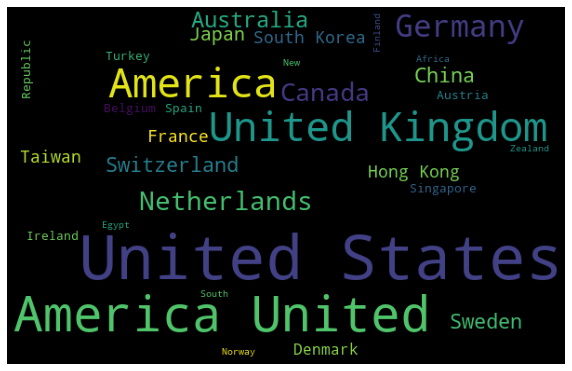

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(10,10)) 

wordcloud = WordCloud(
                          background_color='black',
                          width=600,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<a id = "9" ></a>
# 9. Box Plot

A box plot is a demographic representation of numerical data through their quartiles. The end and upper quatiles are represented in box,  while the median (second quartile) is notable by a line inside the box. Plotly.express is convenient,high-ranked interface to plotly which operates on variet of data and produce a easy-to-style figure.Box are much beneficial for comparing the groups of data. Box plot divide approx. 25% of section data into sets which helps ion quickly identifying  values, the dispersion of the data set, and signs of skewness.

In [20]:
import plotly
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt

x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
plotly.offline.iplot(data) 

<a id = "10" ></a>
# 10. Scatter Plot Matrix

In [21]:
#it helps us to see covariance and relation between more than 2 features
import plotly.figure_factory as ff

dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)

# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
plotly.offline.iplot(fig) 

<a id = "11" ></a>
# 11. Inset Plots

In [22]:
# 2 plots are in one frame

trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),  
)

# second line plot 
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig) 

<a id = "12" ></a>
# 12. 3D Scatter Plot with Colorscaling

A scatterplot can be used with several semantic groupings which can help to understand well in a graph. They can plot two-dimensional graphics that can be enhanced by mapping up to three additional variables while using the semantics of hue, size, and style parameters. All the parameter control visual semantic which are used to identify the different subsets. Using redundant semantics can be helpful for making graphics more accessible. It can be created using the scatter_3d function of plotly.express class.

In [23]:
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig) 

# 3D Volume Plots using Plotly in Python

A volume plot is a plot with go.volume which shows many partially transparent isosurfaces for rendering the volume. The opacityscale parameter of go. Volume results in a depth effect and generates better volume rendering. Three-dimensional volume visualization is a method that allows one to observe and manipulate 3D volumetric data. It represents 3D objects in terms of surfaces and edges approximated by polygons and lines.

In [24]:
import plotly.graph_objects as go 
import numpy as np 
  
x1 = np.linspace(-4, 4, 9)  
y1 = np.linspace(-5, 5, 11)  
z1 = np.linspace(-5, 5, 11)  
  
X, Y, Z = np.meshgrid(x1, y1, z1) 
  
values = (np.sin(X**2 + Y**2))/(X**2 + Y**2) 
  
fig = go.Figure(data=go.Volume( 
    x=X.flatten(), 
    y=Y.flatten(), 
    z=Z.flatten(), 
    value=values.flatten(), 
    opacity=0.1, 
    )) 
  
fig.show()

# Treemap in Plotly

Treemap in plotly.express is convenient to use, high_ranking terminal to plotly, which accomplishes a variety of types of data and produces easy-to-style figures. A treemap provides a stratified view of data and makes it easy to blot the patterns. The tree branches are characterized by rectangles and each of the sub_branches is shown in a smaller rectangle.

In [25]:
import plotly.express as px 
fig = px.treemap( 
    names = ["A","B", "C", "D", "E"], 
    parents = ["Plotly", "A", "B", "C", "A"] 
) 
  
fig.show()

<a id = "13" ></a>
# 13. Multiple Subplots

In [26]:
# Multiple Subplots: While comparing more than one features, multiple subplots can be useful.

trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.research,
    name = "research"
)
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name = "citations"
)
trace3 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name = "income"
)
trace4 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name = "total_score"
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig) 

<a id = "14" ></a>
# 14. Animated Data Visualization using Plotly Express

**Data Visualization** is a big thing in the data science industry and displaying the proper statistics to a business or governments can help them immeasurably in improving their services. It is very painful to understand data from different times from multiple charts and make any sense of it. That is where the need for animated data visualizations lie. In this, article we are going to use Plotly Express for plotting and animating the data and datasets from Gapminder. We are going to look at different types of animation provided by Plotly Express.

In [27]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.

/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/life-expectancy/Metadata_Country_API_SP.DYN.LE00.IN_DS2_en_csv_v2_1308162.csv
/kaggle/input/life-expectancy/Metadata_Indicator_API_SP.DYN.LE00.IN_DS2_en_csv_v2_1308162.csv
/kaggle/input/life-expectancy/API_SP.DYN.LE00.IN_DS2_en_csv_v2_1308162.csv


In [28]:
import plotly.express as px 
  
gapminder = px.data.gapminder() 
gapminder.head()
#we have obtained data from almost all countries in the world from 1952 to 2007 
#with fields like life expectancy, GDP per capita and population.  

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


**Life Expectancy Choropleth**

A choropleth is a map that uses differences in color in defined areas about a common property in order to visualize data as an aggregate summary of a region(in this case, a country). Plotly Express makes it easy to plot choropleths. The below code shows how to take information from gapminder. Set the parameter to which you want to color the choropleth to. Here we wanted the choropleth to shade regions on the basis of life expectancy(lifeExp). hover_name shows the set data when hovered over. animation_frame refers to the parameter on which the animation should be done(mostly, this parameter is the time series data).

In [29]:
import plotly.express as px 

gapminder = px.data.gapminder() 
gapminder.head(30) 
  
fig = px.choropleth(gapminder, 
                    locations ="iso_alpha", 
                    color ="lifeExp", 
                    hover_name ="country",  
                    color_continuous_scale = px.colors.sequential.Plasma, 
                    scope ="world", 
                    animation_frame ="year") 
fig.show()

In [30]:
#scope refers to the area of scope of the choropleth. 
#For example, if we type scope=”asia”, the following is displayed:
import plotly.express as px 
gapminder = px.data.gapminder() 
gapminder.head(30) 
fig = px.choropleth(gapminder, 
                    locations ="iso_alpha", 
                    color ="lifeExp", 
                    hover_name ="country",  
                    color_continuous_scale = px.colors.sequential.Plasma, 
                    scope ="asia", 
                    animation_frame ="year") 
fig.show()

**Population Bar Graph**

Now let’s make an animated bar graph using the same dataset using population as our primary data in this instance. Let the x of the data be the continent and y be population and when hovered over the names of the countries should be shown. So let’s set hover to ‘country’. It is important to specify range as it helps in understanding the scale of the data we are working on. The parameter on which the animation is done is, of course, the year. 

In [31]:
import plotly.express as px  
gapminder = px.data.gapminder() 
gapminder.head(15) 
fig = px.bar(gapminder,  
             x ="continent",  
             y ="pop", 
             color ='lifeExp', 
             animation_frame ='year', 
             hover_name ='country',  
             range_y =[0, 4000000000]) 
fig.show()

**GDP Per Capita vs Life Expectancy Density Contour**

The relationship between the life expectancy and GDP per capita across time is an important component for governmental or national data statistics. Governments can(and have) used this for establishing correlation between the two and this thus explains why the increase in life expectancy has also increased the GDP per capita. The approach can be visualized using a density contour plot and a histogram. 

In [32]:
import plotly.express as px 
gapminder = px.data.gapminder() 
gapminder.head(15) 
  
fig = px.density_contour(gapminder,  
                         x ="gdpPercap",  
                         y ="lifeExp",  
                         color ="continent",  
                         marginal_y ="histogram", 
                         animation_frame ='year',  
                         animation_group ='country',  
                         range_y =[25, 100]) 
fig.show()

**GDP Per Capita vs Life Expectancy Scatter Plot**

The same approach can be used for a different kind of plot, that is, the scatter plot. The below code shows how it is done. facet_col is used to split our plot into sub-plots of continent data like shown below. 

In [33]:
import plotly.express as px   
gapminder = px.data.gapminder() 
gapminder.head(15) 
fig = px.scatter( 
    gapminder,  
    x ="gdpPercap",  
    y ="lifeExp",  
    animation_frame ="year",  
    animation_group ="country", 
    size ="pop",  
    color ="continent",  
    hover_name ="country",  
    facet_col ="continent", 
    size_max = 45, 
    range_y =[25, 90] 
) 
fig.show()